In [1]:
import cv2
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from loguru import logger 
import rioxarray as rxr
import natsort
from albumentations.pytorch import ToTensorV2
import albumentations as A
import warnings
warnings.filterwarnings("ignore")

In [33]:
images_train_path = "/home/sebastien/Documents/projects/solafune-finding-mining-sites/data/train"
images_train = natsort.natsorted(glob.glob(os.path.join(images_train_path, "*.tif"), recursive=False))
print("IMAGES {} ### Total:  {}".format(images_train_path, len(images_train)))

df = pd.read_csv("/home/sebastien/Documents/projects/solafune-finding-mining-sites/data/answer.csv", header=None)
df.columns = ['file','target']
print("Target ### Total:  {}".format(len(df)))

IMAGES /home/sebastien/Documents/projects/solafune-finding-mining-sites/data/train ### Total:  1242
Target ### Total:  1242


In [34]:
df_train = pd.DataFrame()
df_train['image_path'] = images_train
df_train['target'] = df['target']
df_train['dataset']  = 'solafune'

In [35]:
df_train.head()

,image_path,target,dataset
0,/home/sebastien/Documents/projects/solafune-fi...,0,solafune
1,/home/sebastien/Documents/projects/solafune-fi...,0,solafune
2,/home/sebastien/Documents/projects/solafune-fi...,0,solafune
3,/home/sebastien/Documents/projects/solafune-fi...,1,solafune
4,/home/sebastien/Documents/projects/solafune-fi...,0,solafune


In [36]:
def data_augmentation(image):
    
    image = np.array(image)
    apply_transform = ["yes", "no"]
    
    if random.choice(apply_transform)=="yes":
        
        
        # Define your augmentation transformations
        transform = A.Compose([
            A.HorizontalFlip(p=0.5),  # Random horizontal flip with a probability of 0.5
            A.VerticalFlip(p=0.5),    # Random vertical flip with a probability of 0.5
            # Add more augmentations as needed
        ])

        # Perform augmentation on the image
        augmented = transform(image=image)
        # Retrieve the augmented image
        augmented_image = augmented['image']
        # augmented_image = np.transpose(augmented_image,(2,1,0))
        
    else:
        augmented_image = image
        
    return augmented_image

In [63]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))
def image_preprocessing(image_path):

    image = xr.open_rasterio(image_path, masked=False).values
    
    # red = image[3,:,:]
    # green = image[2,:,:]
    # blue = image[1,:,:]
    # rgb_composite_n = np.dstack((red, green, blue))

    red = image[3,:,:]*255*2
    green = image[2,:,:]*255*2
    blue = image[1,:,:]*255*2
    
    rgb_image = np.stack((red, green, blue), axis=2).astype(np.uint8)
    rgb_image = Image.fromarray(rgb_image)

    return rgb_image

In [64]:
img_path = df_train.image_path.iloc[21]

image = image_preprocessing(img_path)

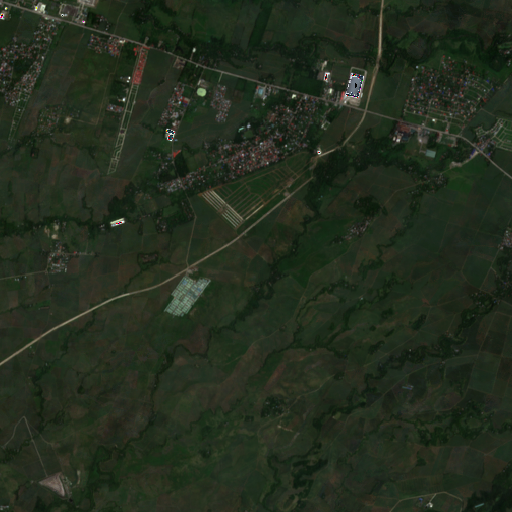

In [65]:
image

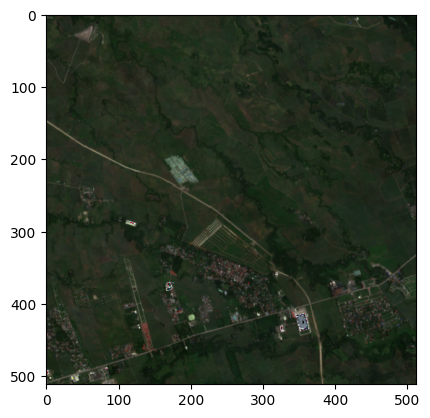

In [59]:
aug = data_augmentation(image)
plt.imshow(aug)

In [113]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))
def image_preprocessing(image_path):

    image = xr.open_rasterio(image_path, masked=False).values
    
def image_preprocessing(image_path):

    image = rxr.open_rasterio(image_path, masked=False).values
    red = image[3,:,:]
    green = image[2,:,:]
    blue = image[1,:,:]
    red_n = normalize(red)
    green_n = normalize(green)
    blue_n = normalize(blue)
    rgb_composite_n= np.dstack((red_n, green_n, blue_n))
    
    
    return rgb_composite_n

   

In [114]:
img_path = df_train.image_path.iloc[10]

image = image_preprocessing(img_path)

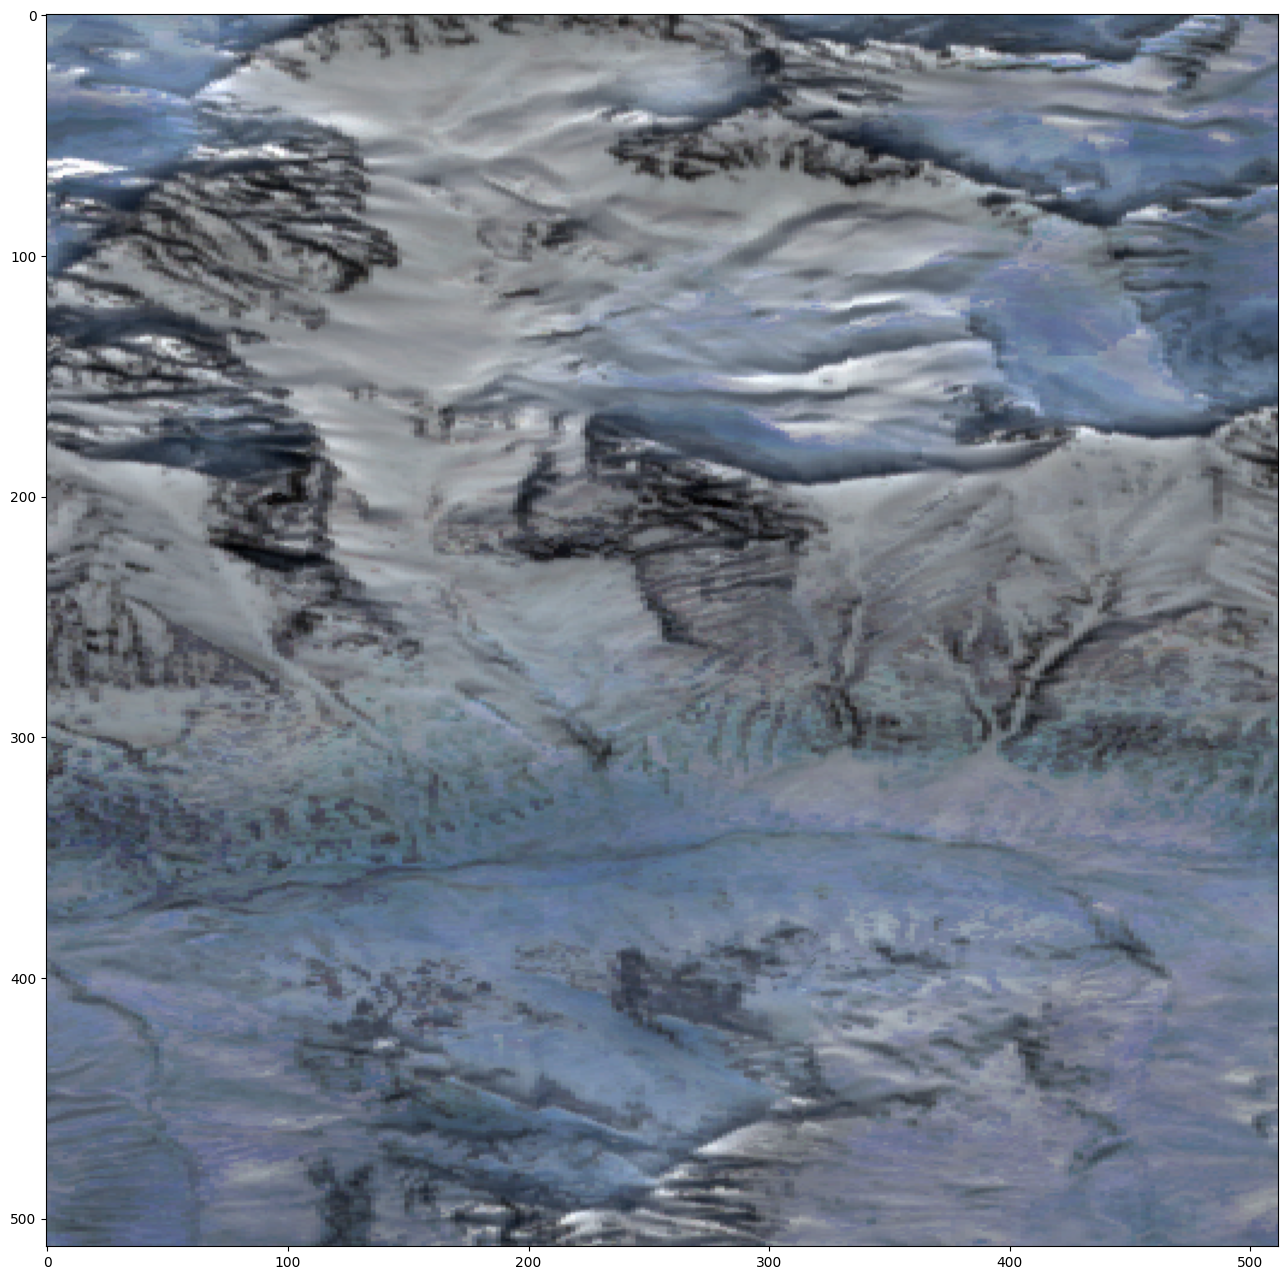

In [115]:
plt.figure(figsize=(16,16))
plt.imshow(image)

In [118]:
image[1,:,:].min()

0.08826156